In [360]:
import torch
import pandas as pd
from torchvision.datasets import MNIST
import torchvision.transforms as tfs
from sklearn.metrics import accuracy_score
from torch import FloatTensor
from torch.utils.data import DataLoader
import numpy as np
from torch.nn.functional import cross_entropy
import matplotlib.pyplot as plt
import torch.nn as nn
from torchsummary import summary
from sklearn.metrics import classification_report

device = torch.device('cpu')

df = pd.read_csv(r'/Users/aleksandrcernysov/Desktop/SimpleNN/train_distance.csv', delimiter=',')
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='mood.name')

df_test = pd.read_csv(r'/Users/aleksandrcernysov/Desktop/SimpleNN/test_distance.csv', delimiter=',')
df_test = df_test.drop(columns='Unnamed: 0')
df_test = df_test.drop(columns='mood.name')
# train_X = torch.tensor(df.iloc[:,1:68].values)
# train_y = torch.tensor(df.iloc[:,68:69].values)

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(df.iloc[:,0:68].values), torch.from_numpy(df['mood.value'].values))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(df_test.iloc[:,0:68].values), torch.from_numpy(df_test['mood.value'].values))

features = 68
classes = 7
epochs = 12000
lr=0.03
history = []

W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()

batch_size = 140

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)


x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([140, 68]), torch.Size([140]))

In [361]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,mood.value
0,0.503958,0.635976,0.772987,0.912800,1.067227,1.229144,1.406041,1.574900,1.719888,1.818597,...,1.340153,1.267446,1.297101,1.339118,1.380831,1.499939,1.439532,1.397820,1.349592,6
1,0.455378,0.585128,0.724944,0.870749,1.033333,1.204898,1.384721,1.552307,1.692061,1.794641,...,1.339687,1.256356,1.298995,1.342619,1.396310,1.542314,1.459507,1.412889,1.358474,6
2,0.520122,0.645792,0.781892,0.917268,1.069422,1.223847,1.396959,1.563821,1.710287,1.819216,...,1.369065,1.277937,1.313141,1.342980,1.389960,1.532971,1.468027,1.424765,1.384135,6
3,0.494398,0.608087,0.730483,0.849470,0.974364,1.114846,1.265010,1.413043,1.549324,1.651139,...,1.235416,1.141883,1.213190,1.258312,1.299720,1.407989,1.352210,1.310803,1.259773,6
4,0.466752,0.593168,0.722689,0.849105,0.989526,1.145536,1.313117,1.475764,1.629156,1.745281,...,1.224577,1.164901,1.229387,1.274510,1.324930,1.440628,1.340762,1.290342,1.242114,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.441846,0.565461,0.700585,0.841310,0.993241,1.161064,1.345086,1.517355,1.664840,1.769151,...,1.243393,1.098587,1.208805,1.267933,1.320546,1.478931,1.434844,1.382536,1.314395,4
136,0.417915,0.560163,0.710815,0.861162,1.024297,1.211728,1.402935,1.592011,1.736695,1.820180,...,1.276093,1.123188,1.243393,1.314030,1.369139,1.502618,1.471319,1.413713,1.343076,4
137,0.438193,0.562112,0.688223,0.820241,0.968457,1.132566,1.306966,1.479540,1.625137,1.721349,...,1.202168,1.094934,1.249239,1.317379,1.372793,1.473998,1.379308,1.323895,1.252649,4
138,0.399038,0.529168,0.665205,0.804043,0.964682,1.149312,1.341432,1.529229,1.671721,1.773536,...,1.215199,1.068810,1.214164,1.291012,1.354524,1.503593,1.438375,1.375167,1.295518,4


In [362]:
model = nn.Sequential(
  nn.Linear(features, 68),
  nn.ELU(),
  nn.Linear(68, classes)
    
)

model.to(torch.device('cpu'))

Sequential(
  (0): Linear(in_features=68, out_features=68, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=68, out_features=7, bias=True)
)

In [363]:
summary(model, (features,), batch_size=140)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [140, 68]           4,692
               ELU-2                  [140, 68]               0
            Linear-3                   [140, 7]             483
Total params: 5,175
Trainable params: 5,175
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 0.15
Params size (MB): 0.02
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


In [364]:
criterion = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) in its core, applied to logits

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

In [365]:
for i in range(epochs):
  for x_batch, y_batch in train_loader:
    # 1. load batches of data correctly
    x_batch = x_batch.view(x_batch.shape[0], -1).to(device).float()
    y_batch = y_batch.to(device)

    # 2. compute scores with .forward or .__call__
    logits = model(x_batch)

    # 3. compute loss
    loss = criterion(logits, y_batch)
    history.append(loss.item())

    # 4. calc gradients
    optimizer.zero_grad()
    loss.backward()

    # 5. step of gradient descent
    optimizer.step()
  if (i + 1) % 250 == 0:
      print(f'{i+1},\t loss: {history[-1]}')

250,	 loss: 1.1313012838363647
500,	 loss: 0.7151995897293091
750,	 loss: 0.738715410232544
1000,	 loss: 0.641415536403656
1250,	 loss: 0.4999934136867523
1500,	 loss: 0.36656683683395386
1750,	 loss: 0.5766363143920898
2000,	 loss: 0.3814147114753723
2250,	 loss: 0.4427671432495117
2500,	 loss: 0.5232588648796082
2750,	 loss: 0.5258439183235168
3000,	 loss: 0.4827040433883667
3250,	 loss: 0.4838475286960602
3500,	 loss: 0.3507867753505707
3750,	 loss: 0.4708891808986664
4000,	 loss: 0.3687277138233185
4250,	 loss: 0.4270370900630951
4500,	 loss: 0.4289480745792389
4750,	 loss: 0.3638679087162018
5000,	 loss: 0.3889126777648926
5250,	 loss: 0.4008982479572296
5500,	 loss: 0.3527096211910248
5750,	 loss: 0.29178935289382935
6000,	 loss: 0.21018007397651672
6250,	 loss: 0.3759779930114746
6500,	 loss: 0.37668541073799133
6750,	 loss: 0.2575524151325226
7000,	 loss: 0.38303136825561523
7250,	 loss: 0.2900281250476837
7500,	 loss: 0.4311717748641968
7750,	 loss: 0.33790045976638794
8000,	 

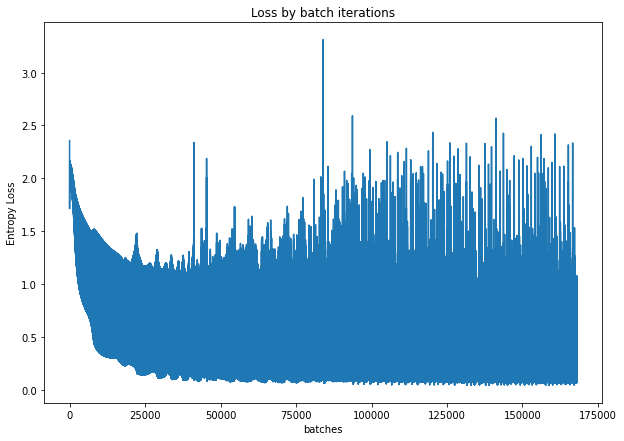

In [366]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

In [367]:
acc = 0
batches = 0

y_true = []
y_pred = []

for x_batch, y_batch in test_loader:
  # load batch of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1).to(device).float()
  y_batch = y_batch.to(device)

  preds = torch.argmax(model(x_batch), dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()
  
  y_true = y_batch.tolist()
  y_pred = preds.tolist()
    

print(f'Test accuracy {acc / batches:.3}')
print(classification_report(y_true, y_pred, target_names=['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг']))

Test accuracy 0.85
               precision    recall  f1-score   support

Нейтральность       0.78      0.90      0.84        20
       Злость       0.90      0.90      0.90        20
       Грусть       0.86      0.60      0.71        20
    Удивление       0.79      0.95      0.86        20
      Счастье       0.95      1.00      0.98        20
   Отвращение       0.95      0.95      0.95        20
        Испуг       0.72      0.65      0.68        20

     accuracy                           0.85       140
    macro avg       0.85      0.85      0.85       140
 weighted avg       0.85      0.85      0.85       140



In [368]:
# Test accuracy 0.797, epochs = 10000, 64, relu, 64
# Test accuracy 0.852, epochs = 10000, 68, relu, 68